In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



# CoderHouse - Data Science

#### Cuarta entrega - Marco Ormello - Comision: 32845

## Integracion de visualizaciones. Parte 2

### Abstract

##### El presente trabajo tiene como objetivo realizar un análisis de los datos contenidos en un dataset que muestra la relación entre los hábitos de consumo de alcohol y tabaco, la situación socioeconómica y los gustos culinarios de una muestra de personas. La motivación de este estudio es conocer las variables que influyen en los gustos gastronómicos y el rating que otorgan a diferentes platos.
##### La elección de este dataset se basó en la relevancia del tema de estudio y la disponibilidad de información detallada y estructurada. Además, se espera que los resultados obtenidos puedan ser útiles para comprender mejor las preferencias gastronómicas de diferentes grupos socioculturales y económicos, y así ayudar a la industria de la alimentación y bebidas en la toma de decisiones comerciales.
##### La audiencia a la que está orientado este análisis son aquellas entidades relacionadas con la industria gastronómica, tales como restaurantes, bares y cafeterías, así como también empresas de catering. Estas entidades podrían verse beneficiadas al obtener una aproximacion a poder predecir las tendencias gastronómicas de sus clientes potenciales, según las propiedades analizadas en este estudio. Por ejemplo, si se sabe que las personas menores de 30 años prefieren la comida japonesa, un restaurante podría enfocar su oferta en este tipo de comida y así atraer a más clientes jóvenes.
##### Inicialmente, se realiza un análisis general de la muestra, en el que se evidencia que predominan los varones menores de 30 años, y en su mayoría, estudiantes. Además, se observa que la media de bebedores es mayor que la de fumadores, y se encuentra una tendencia en el aumento de ambos hábitos según la edad. A partir de estos resultados, se plantea una hipótesis que indica que existen factores socioculturales, económicos y hábitos de vida que permiten clasificar a las personas y predecir sus gustos culinarios.
##### Se realiza una primera aproximación para evaluar la relación entre los factores socioculturales y los gustos gastronómicos. Se evidencia que las personas de mayor edad prefieren la comida italiana, mientras que los jóvenes prefieren la japonesa. Asimismo, se observa que los fumadores habituales prefieren la comida japonesa, los sociales la comida india y los no fumadores la filipina. En cuanto al consumo de alcohol, se observa que los que consumen alcohol prefieren la comida filipina y los que no consumen alcohol prefieren la comida japonesa.
##### Se encuentra un patrón interesante al analizar la situación económica de los encuestados, ya que la media de budget es mayor para la comida japonesa, pero las personas están dispuestas a dedicar un budget mayor para la comida italiana, aunque lo hacen con menor frecuencia. También se observa que las personas divorciadas suelen dar en general mejores puntajes en las valoraciones culinarias.
##### En conclusión, este estudio muestra la relación entre los hábitos de consumo, la situación socioeconómica y los gustos culinarios de una muestra de personas. Los resultados obtenidos permiten establecer patrones y relaciones entre las variables analizadas, lo que puede ser de gran utilidad para el desarrollo de estrategias de marketing en el sector gastronómico.

### Restaurant's cuisine ratings

##### El siguiente dataset contiene informacion de la situacion sociocultural y habitos de consumo de alcohol y tabaco de una muestra de personas y su relacion con la puntuacion que otorgaron a platos de diferentes categorias.

In [2]:
df = pd.read_csv('/workspaces/data-science/data/raw/Cuisine_rating.csv')
print(df.shape)
df.info()
df.head()


(200, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


##### Inicialmente haremos un analisis global del dataset para conocer cuales son las caracteristicas de nuestra muestra.

### Analisis general de la muestra.

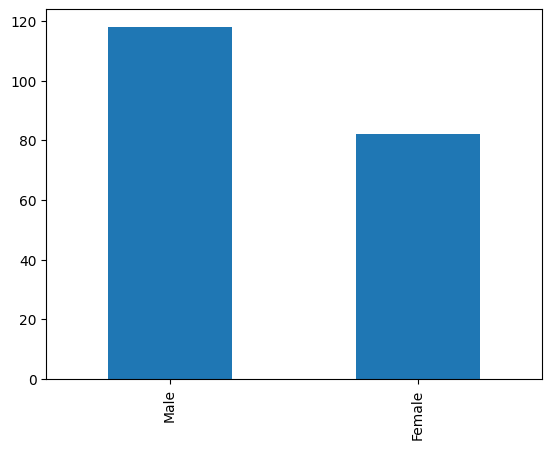

In [3]:
df['Gender'].value_counts().plot(kind='bar')
plt.show()

##### Los integrantes de esta muestra se consideran en su mayoria varones.

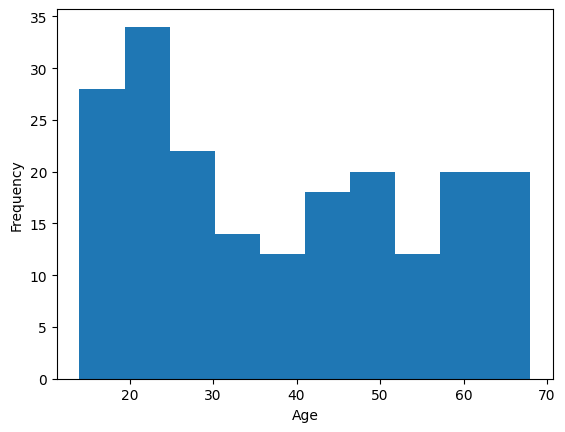

In [4]:
now = datetime.now()
df['Age'] = now.year - df['YOB']

plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


##### Predominan las personas menores de 30 años en esta muestra.

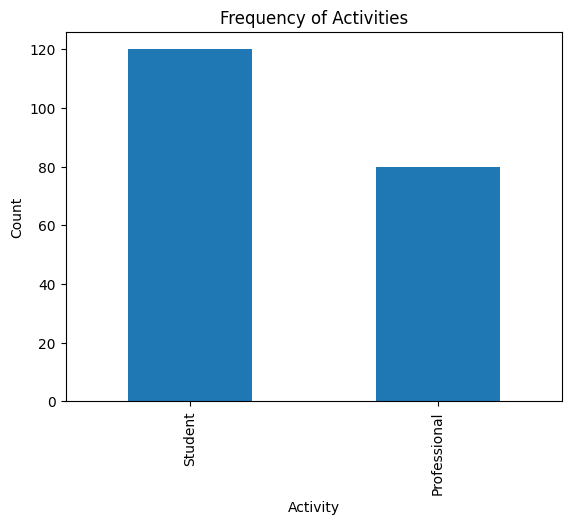

In [5]:
activity_counts = df['Activity'].value_counts()

activity_counts.plot(kind='bar')

plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Frequency of Activities')

plt.show()

##### En su mayoria son estudiantes.

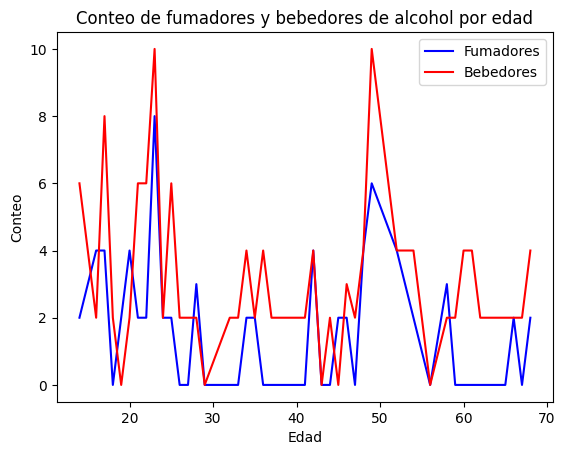

In [6]:
smoker_counts = df.groupby('Age')['Smoker'].apply(lambda x: x[x == 'Often'].count())
alcohol_counts = df.groupby('Age')['Alcohol '].apply(lambda x: x[x != 'Often'].count())


fig, ax = plt.subplots()
ax.plot(smoker_counts.index, smoker_counts.values, color='blue', label='Fumadores')
ax.plot(alcohol_counts.index, alcohol_counts.values, color='red', label='Bebedores')
ax.legend()
ax.set_xlabel('Edad')
ax.set_ylabel('Conteo')
ax.set_title('Conteo de fumadores y bebedores de alcohol por edad')
plt.show()

##### Podemos apreciar que la media de bebedores es mayor que la de fumadores en general a lo largo de los años. Ademas podemos ver una muy interesante una tendencia en el aumento en ambos habitos de consumo segun la edad, habiendo dos picos entre los 20 y los 30 años y entre los 45 a 55 años para fumadores y bebedrores.

### Hipotesis:
##### Existe una relacion entre factores socioculturales, economicos y habitos de vida que sirven para clasificar en grupos a las personas y predecir sus gustos culinarios.

##### Haremos una primera aproximacion para evaluar cuales son los factores socioculturales con mayor relacion a diferentes gustos gastronomicos y al mismo tiempo su influencia en el rating que otorgaron.

#### Edad.

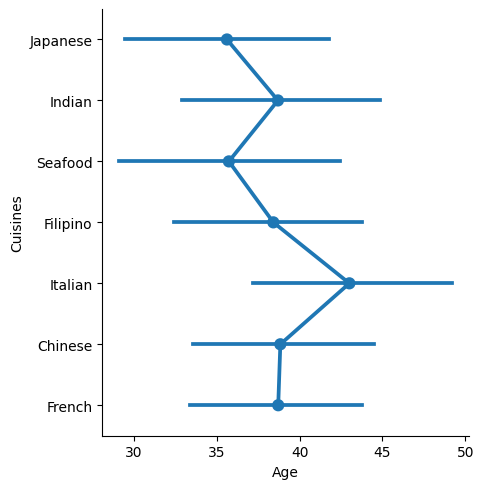

In [7]:

sns.catplot(x='Age', y='Cuisines', kind="point", data=df)


plt.show()

##### Este grafico de tipo CatPlot representa la magnitud y el promedio de la contabilizacion de elecciones de preferencias gastronomicas segun la edad del entrevistado. Inicialmente podemos obtener como referencia que las personas de mayor edad prefieren la comida italiana y los mas jovenes prefieren la comida japonesa.

#### Hábitos.

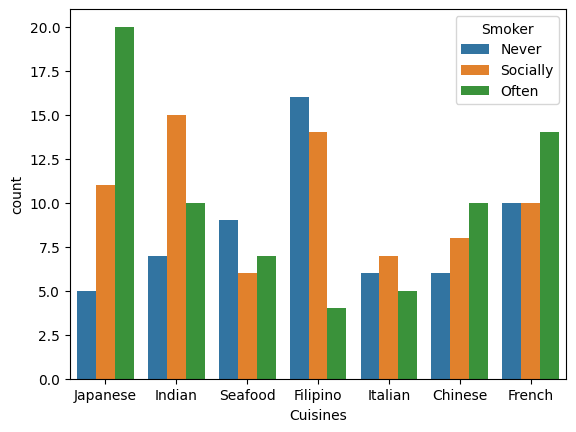

In [8]:
sns.countplot(x='Cuisines', hue='Smoker', data=df)

plt.show()


##### Al mismo tiempo podemos observar en este grafico que los fumadores habituales prefieren la comida japonesa, los sociales la comida india y los no fumadores la filipina.

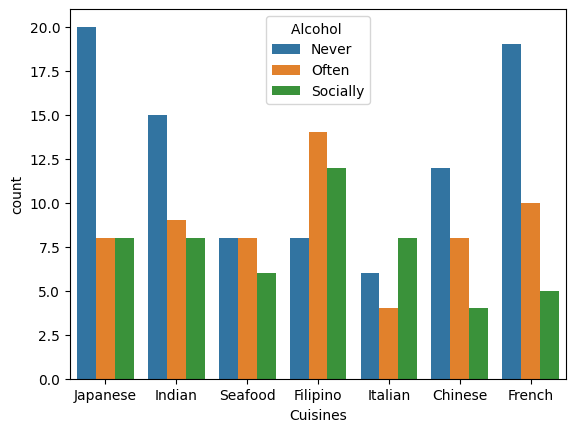

In [9]:
sns.countplot(x='Cuisines', hue='Alcohol ', data=df)

plt.show()

##### En este grafico podemos ver que las personas que consumen alcohol, sea de manera social o habitual, prefieren la comida filipina y los que no consumen alocohol prefieren la comida japonesa.
##### Es interesante destacar que los resultador fueron practicamente los opuestos en comparacion a cuando la variable tenida en cuenta es el habito de fumar.

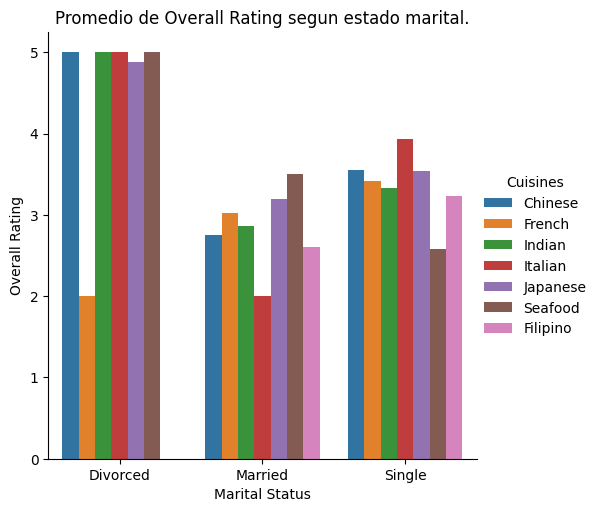

In [10]:
df_grouped = df.groupby(['Marital Status', 'Cuisines'])['Overall Rating'].mean().reset_index(name='mean_rating')

sns.catplot(x='Marital Status', y='mean_rating', hue='Cuisines', kind='bar', data=df_grouped)

plt.xlabel('Marital Status')
plt.ylabel('Overall Rating')
plt.title('Promedio de Overall Rating segun estado marital.')

plt.show()



##### Este grafico evidencia que las personas divorciadas tienden a dar mayores Overal Ratings, es decir mejores puntuaciones globales, sea cual sea su preferencia gastronomica.

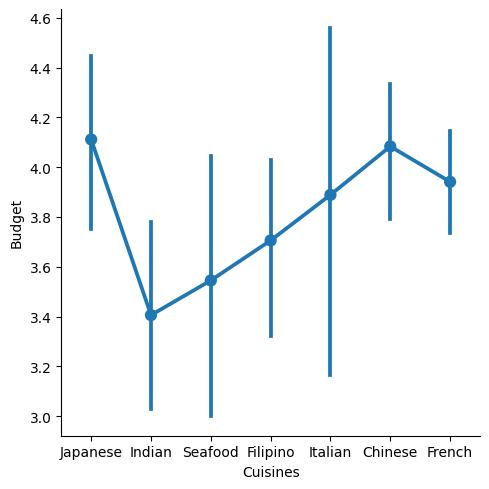

In [11]:
sns.catplot(x='Cuisines', y='Budget', kind="point", data=df)


plt.show()

#### Conclusiones

##### En base a este dataframe, es posible realizar un analisis que nos premita encontrar grupos socioeconomicos con caracteristicas particulares que pueden estar relacionados con diferentes tipos de cocina.
##### Podemos ver los siguientes patrones de preferencia segun diferentes variables analizadas:
##### - Las personas de mayor edad prefieren la comida italiana, las de menor la japonesa.
##### - Segun los habitos de consumo analizados, los fumaodres y tomadores de alcohol tienen en general preferencias opuestas, siendo para los consumidores habituales de de tabaco, la comida japonesa la mas preferida, pero para los bebedores, la menos preferida. Lo mismo sucede pero de manera opuesta para la comida filipina, siendo lo mas consumido por los bebedores y lo menos consumido por los fumadores. 
##### - Con respecto al poder adquisitivo, la media de budget es mayor para la comida japonesa, pero las personas estan dispuestas a dedicar un budget mayor para la comida italiana, aunque lo hacen con menor frecuencia por lo que la media es menor que la japonesa.
##### - Las personas divorciadas suelen dar en general mejores puntajes en las valoraciones culinarias, estos llegan a ser de una media de mas del doble con respecto a los solteros y casados.
##### 


#### Recomendaciones basadas en los insights observados

##### Los hallazgos del análisis muestran la importancia de conocer a su grupo objetivo y especializarse en una oferta de cocina que los atraiga. Al adaptarse a las preferencias de los clientes potenciales, los establecimientos gastronómicos pueden aumentar su rentabilidad y adquirir ventajas competitivas en determinado mercado al que se dirigen.
##### Por lo tanto, en base a los insights que otorga este analisis de datos, en el aspecto economico es conveniente destinar recursos en especializarse en la oferta de cocina que atraiga a su grupo objetivo. Si su grupo objetivo es de mayor edad, ofrecer opciones de comida italiana puede ser una estrategia efectiva, mientras que la inclusión de opciones de comida japonesa puede atraer a personas más jóvenes. Al adaptar su oferta de cocina a su grupo objetivo, los establecimientos gastronómicos pueden aumentar su atractivo comercial y establecerse como líderes en su nicho de mercado.

##### Es importante destacar que los hábitos de consumo también influyen en la elección de los clientes potenciales. Por ejemplo, la comida filipina mostro mayor afinidad con los potenciales clientes que habituan el consumo de alcohol, este dato seria de vital importancia para destinar recursos a destacarse en el aspecto de bar o la oferta de tragos y bebidas. Al conocer los hábitos de consumo de su audiencia y ofrecer opciones que se ajusten a sus necesidades, los establecimientos pueden mejorar su rentabilidad y aumentar su participación de mercado.

##### Además, es importante que los establecimientos gastronómicos que se concentren en ofrecer opciones de alta calidad, si bien la media de budget es mayor para la comida japonesa, las personas están dispuestas a dedicar un budget mayor para la comida italiana, aunque lo hacen con menor frecuencia. Por lo tanto, un establecimiento de comida italiana otorga cierto respaldo cultural para buscar caracterizarse por una imagen de tipo premium o de alta cocina. Al ofrecer opciones de alta calidad y ajustar los precios para atraer a su audiencia objetivo, los establecimientos pueden aumentar sus ingresos y mejorar su rentabilidad.